Offset: 223.13s


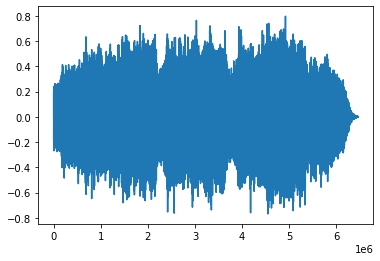

In [21]:
import argparse

import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pyaudio
import pylab
import time
import sys
import wave

RATE = 44100
CHUNK = int(RATE/20) # RATE / number of updates per second
frames = []
def soundplot(stream):

    t1=time.time()
    #use np.frombuffer if you face error at this line
    #data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    data = stream.read(CHUNK)
    frames.append(data) 

def find_offset(within_file, find_file, window):
    y_within, sr_within = librosa.load(within_file, sr=None)
    y_find, _ = librosa.load(find_file, sr=sr_within)

    c = signal.correlate(y_within, y_find[:sr_within*window], mode='valid', method='fft')
    peak = np.argmax(c)
    offset = round(peak / sr_within, 2)

    fig, ax = plt.subplots()
    ax.plot(c)
    fig.savefig("cross-correlation.png")

    return offset


def main():
    
    p=pyaudio.PyAudio()
    stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
                  frames_per_buffer=CHUNK)
    #for i in range(sys.maxsize**10):
    for i in range(100):    #100 = 5 seconds
        soundplot(stream)
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    wf = wave.open("output.wav",'wb')
    wf.setnchannels(1)
    #wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setsampwidth(2)
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    offset = find_offset('audio/africa-toto.wav', 'output.wav', 10)
    print(f"Offset: {offset}s" )


if __name__ == '__main__':
    main()